In [3]:
import pandas as pd

In [4]:
ha_data = pd.read_csv("heart_attack_dataset.csv")

In [5]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.9.0.36.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread          

## **Question 1** : Clean the dataset by dropping any NaN data and getting rid of the "patient ID" column.

In [6]:
drop_na = ha_data.dropna()
clean_data = drop_na.drop("Patient ID", axis=1)


## **Question 2**: What country is the most represented in the dataset and how might this impact the data we see?



In [7]:
most_rep = clean_data.value_counts("Country")
print(most_rep)

""" - The country that is most represented is Germany.
This might impact the data we see because someone might assume living in Germany
could pose a greater risk of a heart attack. However, we cannot make this assumption
since each country has a different number of people represented, and it would only
seem this way because Germany has the most represented patients."""

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64


' - The country that is most represented is Germany.\nThis might impact the data we see because someone might assume living in Germany\ncould pose a greater risk of a heart attack. However, we cannot make this assumption\nsince each country has a different number of people represented, and it would only\nseem this way because Germany has the most represented patients.'

## **Question 3**: What are the top 10 highest BMIs in the dataset?

---


In [8]:
highest_bmi = clean_data["BMI"].sort_values(ascending=False)
highest_bmi.head(10)

,BMI
136,39.997211
206,39.993581
1728,39.989915
6957,39.986127
5443,39.985120
3548,39.984343
4260,39.980327
2750,39.979234
1428,39.978977
2958,39.977267


## **Question 4**: What is the average hours of physical activity of person who is at risk of a heart attack has? (Remember that Heart Attack Risk=1 means at risk).

In [9]:
harisk = clean_data.loc[clean_data["Heart Attack Risk"] == 1]

avg = harisk.groupby("Heart Attack Risk")["Physical Activity Days Per Week"].mean()

# note to self : i used .groupby on harisk NOT clean_data bc harisk changes the dataset
# to have only the rows when heart attack risk = 1

print(avg)



Heart Attack Risk
1    3.474355
Name: Physical Activity Days Per Week, dtype: float64


## **Question 5**: What is the heart attack risk across continents?

In [10]:
clean_data.groupby("Continent")["Heart Attack Risk"].mean()

,Heart Attack Risk
Continent,
Africa,0.368843
Asia,0.353913
Australia,0.360860
Europe,0.345828
North America,0.376744
South America,0.366373


The heart attack risk across continents is very similar, between 0.34 to 0.377.

## **Question 6**: Use a medically backed website to find the value of what is considered to be "high" or "dangerous" cholesteral level; provide a link to that website and find the average age of people with high numbers.

This website says 240 is considered to be high cholesterol : https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

In [11]:
high_chol = clean_data.loc[clean_data.Cholesterol >= 240]
high_chol.Age.mean()

53.709339137316974

In [12]:
clean_data.loc[clean_data.Cholesterol>=240]["Age"].mean()

53.709339137316974

The average age of people with high cholesterol is aproximately 53.71.

## **Question 7**: Create an indicator columns for high (200000+), middle (100000-200000), and low income (under 100000). Find the amount of people at risk for a heart attack in each of these categories.

In [13]:

clean_data["HighIncome"] = clean_data["Income"]>200000
clean_data["MiddleIncome"] = (clean_data["Income"] >= 100000) & (clean_data["Income"] <=200000)
clean_data["LowIncome"] = clean_data["Income"]<100000



In [14]:
clean_data.groupby("LowIncome")["Heart Attack Risk"].value_counts()

# The amount of people who are low income that are also at a
#... risk of a heart attack is 923

LowIncome  Heart Attack Risk
False      0                    3975
           1                    2216
True       0                    1649
           1                     923
Name: count, dtype: int64

In [15]:
clean_data.groupby("MiddleIncome")["Heart Attack Risk"].value_counts()

# The amount of people who are middle income that are also at a
#... risk of a heart attack is 1120

MiddleIncome  Heart Attack Risk
False         0                    3595
              1                    2019
True          0                    2029
              1                    1120
Name: count, dtype: int64

In [16]:
clean_data.groupby("HighIncome")["Heart Attack Risk"].value_counts()

# The amount of people who are high income that are also at a
#... risk of a heart attack is 1096

HighIncome  Heart Attack Risk
False       0                    3678
            1                    2043
True        0                    1946
            1                    1096
Name: count, dtype: int64

## **Question 8**: What **percentage** of people in this dataset in the United States had families with a history of attack?

In [17]:

us_history = clean_data.loc[clean_data["Country"]=="United States"]
avg_hist = us_history["Family History"].mean()
percentage = avg_hist * 100

print(f"The percentage of people in the United States who had families with a history of attack is : {percentage}")

The percentage of people in the United States who had families with a history of attack is : 55.47619047619048


## **Question 9**: Find the age, diet type, and BMI of the 10 youngest people at risk of a heart attack.

In [18]:
cols = ["Age", "Diet", "BMI"]
cols_atrisk = harisk[cols]

var = cols_atrisk.sort_values(by=["Age"],ascending=True).head(10)

print(var)


      Age       Diet        BMI
753    18    Average  25.259222
3037   18  Unhealthy  38.309628
733    18  Unhealthy  39.371783
1571   18    Healthy  28.212613
6615   18    Average  31.273761
3832   18  Unhealthy  33.931558
457    18    Average  22.565538
2575   18    Healthy  37.910065
2285   18  Unhealthy  39.433884
4505   18  Unhealthy  24.848483


## **Question 10**: Create a **scatter** plot showing the relationship between hours of sleep and stress level for the ten youngest people at risk of a heart attack.

To do this,  you'll need to add what type of plot you're making into the argument. So it will start with `(kind="scatter"...)`

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
at_risk = clean_data[clean_data["Heart Attack Risk"] == 1]
sleep = at_risk.groupby("Age")["Sleep Hours Per Day"].mean().head(10)
stress = at_risk.groupby("Age")["Stress Level"].mean().head(10)
print(sleep, stress)

Age
18    6.658537
19    6.700000
20    6.974359
21    6.536585
22    7.100000
23    7.045455
24    6.959184
25    7.363636
26    7.268293
27    6.914894
Name: Sleep Hours Per Day, dtype: float64 Age
18    5.853659
19    5.050000
20    5.282051
21    5.829268
22    4.600000
23    5.340909
24    5.673469
25    5.036364
26    4.951220
27    5.297872
Name: Stress Level, dtype: float64


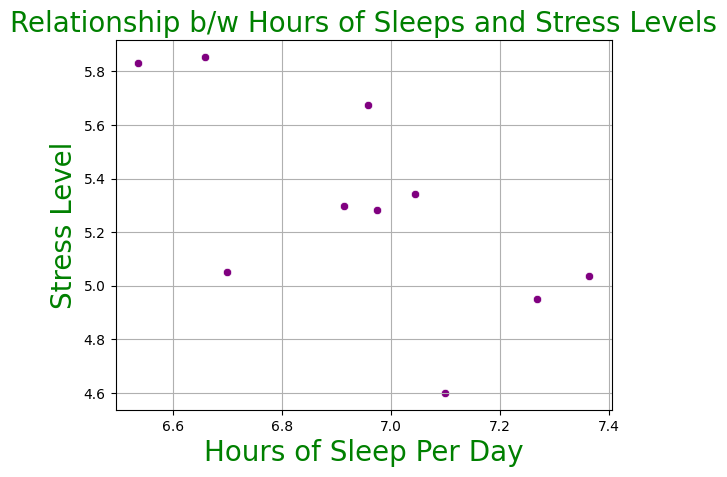

In [24]:
sns.scatterplot(at_risk, x=sleep, y=stress, color = "purple")
plt.xlabel("Hours of Sleep Per Day", fontsize = 20, color = "green")
plt.ylabel("Stress Level", fontsize = 20, color = "green")
plt.title("Relationship b/w Hours of Sleeps and Stress Levels", fontsize=20, color="green")
plt.grid(True)
plt.show()


## **Question 11**: What other important demographic factor could be missing from this dataset to predict heart attacks? Link to any sources you use.

I was surprised to discover that according to Dr.Arshed A. Quyyumi, the level of education a person has may also effect their risk of having a heart attack.

website : https://www.heart.org/en/news/2020/08/12/more-school-less-heart-disease-researchers-keep-finding-evidence#:~:text=Education%20is%20an%20excellent%20predictor,having%20diabetes%2C%20it's%20still%20significant.


## **Question 12**: This data is taken from intake papers at a hospital. How does this impact any potential findings?

I was not sure what intake papers are, but looking it up I have found that these types of medical documents are typically only physical copies. Excluding online medical records of people with or without heart attack history makes this dataset a much smaller sample of people than it could be, compared to if the data included online medical records. Some of the information could also be correct due to the fact that patients fill out these forms to the best of their own knowledge. For instance, a patient could put that they do not have family history of heart attacks even if they actually do because they are unaware of their family heart attack history.


## **Question 13**: Copy an error code that you got while running the homework and paste it here. Explain (either in a paragraph or using annotation in the code) how you fixed this. If you had to look anything up, link to those sources.

- I was having trouble the .loc[] function so I used this website : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

- The majority of my error codes were Syntax Errors, so all I did to fix this was reference back to the "Working in Panas" Google Colab Notebook from the first week of class, or use a website if that did not help, such as for .loc[].